In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
#actually layer 2 and 5 epochs
layout = np.load("epoch2_TSENaligned.npy")

In [20]:
import pylab
def plot_color(matrix, labels, filename=""):
    x = matrix[:, 0].tolist()
    y = matrix[:, 1].tolist()
    plt.figure(figsize=(6, 6))
    pylab.scatter(x, y, c=labels, cmap='Dark2')
    if(len(filename) > 0): plt.savefig(filename)

In [15]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [22]:
layout[0].shape

(500, 2)

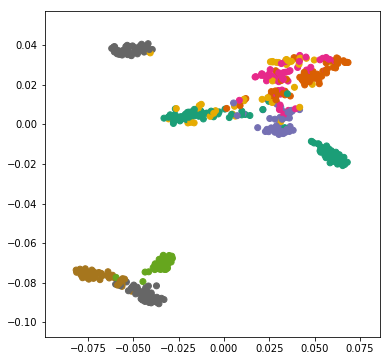

In [23]:
plot_color(layout[0], test_labels[:500])

In [55]:
df = pd.DataFrame()

In [91]:
for i in range(len(layout)): 
    df['epoch'+str(i)] = list(map(lambda x,y: (x,y), layout[i, :, 0], layout[i,:, 1]))
df['label'] = test_labels[:500]
df['id'] = [i for i in range(500)]

In [92]:
df.head()

,epoch0,epoch1,epoch2,epoch3,epoch4,label,id
0,"(-0.04393878, -0.08398102)","(-0.06604431, -0.049704395)","(-0.057969682, -0.05595402)","(-0.025829822, -0.07548307)","(-0.046725478, -0.06621272)",9,0
1,"(0.06284783, 0.030692915)","(0.0059325616, 0.05891685)","(0.030852197, 0.060755614)","(0.043657284, 0.050978515)","(-0.011010509, 0.037106372)",2,1
2,"(0.0667112, -0.01956799)","(0.10305514, -0.032635894)","(0.07376872, -0.06734762)","(0.105188645, -0.018216591)","(0.09453937, -0.022380369)",1,2
3,"(0.058527898, -0.019447286)","(0.108909376, -0.03035353)","(0.07610546, -0.063562416)","(0.09465351, -0.017349178)","(0.098431006, -0.026049435)",1,3
4,"(0.008601321, 0.009854415)","(0.00777243, 0.03224598)","(0.008871127, 0.0053653764)","(0.006452074, 0.019667165)","(0.0391268, 0.027492672)",6,4


In [93]:
data = df.to_json(orient='records', lines=True, index=True)[1:-1].replace('}\n{', '},{')
data = "[{" + data + "}]"

In [94]:
import json
with open('layer2_layout.json', 'w') as outfile:  
    outfile.write(data)

In [69]:
with open('layer2_layout.json') as json_file:  
    data = json.load(json_file)

'"epoch0":[-0.0439387783,-0.0839810222],"epoch1":[-0.0660443082,-0.0497043952],"epoch2":[-0.0579696819,-0.0559540205],"epoch3":[-0.0258298218,-0.0754830688],"epoch4":[-0.046725478,-0.0662127212],"label":9},{"epoch0":[0.0628478304,0.0306929145],"epoch1":[0.0059325616,0.0589168482],"epoch2":[0.0308521967,0.0607556142],"epoch3":[0.0436572842,0.0509785153],"epoch4":[-0.011010509,0.0371063724],"label":2},{"epoch0":[0.0667112023,-0.0195679907],"epoch1":[0.1030551419,-0.0326358937],"epoch2":[0.07376872,-0.0673476234],"epoch3":[0.1051886454,-0.0182165913],"epoch4":[0.0945393667,-0.0223803688],"label":1},{"epoch0":[0.058527898,-0.0194472857],"epoch1":[0.108909376,-0.0303535294],"epoch2":[0.0761054605,-0.0635624155],"epoch3":[0.0946535096,-0.017349178],"epoch4":[0.0984310061,-0.0260494351],"label":1},{"epoch0":[0.0086013209,0.0098544154],"epoch1":[0.0077724298,0.0322459787],"epoch2":[0.0088711269,0.0053653764],"epoch3":[0.0064520738,0.0196671654],"epoch4":[0.0391267985,0.0274926722],"label":6},{